In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format

In [2]:
# df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/results.hard")
df = pd.read_csv('../gotest/results.2019-12-04T22:35:30+01:00.csv')
df.head()

,Server,Worker,Image,ServerUUID,Start_ns,Time_ns,ServerTime1,ServerTime2,ServerTime3,ThreadTime1,ThreadTime2,ThreadTime3
0,nevers,0,001-i-pmiZHRmoE.jpg,96770be5-fcbe-4a37-8a17-5a9bf7eecaf8,1575495330619811564,51930752,1572608,48032283,9536,1570992,48032838,7296
1,nevers,0,002-kldU494J0x4.jpg,96770be5-fcbe-4a37-8a17-5a9bf7eecaf8,1575495330672493230,49938147,1240968,47324895,8583,1240354,47325193,6543
2,nevers,0,003-p7RGsRGP_po.jpg,96770be5-fcbe-4a37-8a17-5a9bf7eecaf8,1575495330723104293,52589682,1644849,49351215,9059,1643520,49351471,7174
3,nevers,0,004--ttdROg92Z8.jpg,96770be5-fcbe-4a37-8a17-5a9bf7eecaf8,1575495330776451084,50467719,1098394,47900915,8583,1097416,47900982,6653
4,nevers,0,005-AY6D3lKLjXk.jpg,96770be5-fcbe-4a37-8a17-5a9bf7eecaf8,1575495330827571401,47722665,788211,45626878,8344,787341,45626768,6709


In [5]:
# df["id"] = df.index
df['Start_time'] = pd.to_datetime(df['Start_ns'])
df['Overhead_ns'] = df['Time_ns'] - df.loc[:,'ServerTime1':'ServerTime3'].sum(axis=1)
df = df[df['Start_time'] > '2019-12-05 15:00:00']
with pd.HDFStore('data.h5') as store:
    store['nevers'] = df



In [ ]:
# servers = ["nevers", "zeit-now-warm", "gcp-run-warm", "gcp-fun-warm", "azure-fun-warm", "ibm-fun-warm", "ali-fun-warm", "gcp-app-warm", "aws-lambda-warm"]
servers = ["zeit-now-warm", "gcp-run-warm", "gcp-fun-warm", "azure-fun-warm", "ibm-fun-warm", "ali-fun-warm", "gcp-app-warm", "aws-lambda-warm"]
time_ns_ser = {}
for server in servers:
  time_ns_ser[server] = df[(df['Server'] == server) & (df['Worker'] != 0)].reset_index()
df500 = pd.concat(time_ns_ser, axis=1, join='outer')
for server in servers:
  time_ns_ser[server] = df[(df['Server'] == server) & (df['Worker'] == 0)].reset_index()
df10 = pd.concat(time_ns_ser, axis=1, join='outer')

In [7]:
df10.head()

zeit-now-warm                                             \
          index         Server Worker                Image   
0         79816  zeit-now-warm      0  001-i-pmiZHRmoE.jpg   
1         79817  zeit-now-warm      0  002-kldU494J0x4.jpg   
2         79818  zeit-now-warm      0  003-p7RGsRGP_po.jpg   
3         79819  zeit-now-warm      0  004--ttdROg92Z8.jpg   
4         79820  zeit-now-warm      0  005-AY6D3lKLjXk.jpg   

                                                                          \
                             ServerUUID             Start_ns     Time_ns   
0  d8255679-7ad6-4895-9952-b296ea555bac  1575560357127591510  1826494287   
1  d8255679-7ad6-4895-9952-b296ea555bac  1575560358954173501   462220755   
2  d8255679-7ad6-4895-9952-b296ea555bac  1575560359416478500   353075515   
3  d8255679-7ad6-4895-9952-b296ea555bac  1575560359769604153   302241570   
4  d8255679-7ad6-4895-9952-b296ea555bac  1575560360071906532   297291208   

                                       ...      aws-lambda-warm              \
  ServerTime1 ServerTime2 ServerTime3  ...             Start_ns     Time_ns   
0      679969   251775264       11920  ...  1575560621666401953  2906991119   
1      298738   102396488       16212  ...  1575560624573468528  1413423964   
2      398874    97865343       11920  ...  1575560625986960133  1346399408   
3      173568    90255260       15020  ...  1575560627333442984  1179691280   
4      120878    86119890     8865833  ...  1575560628513240853  1078801597   

                                                                           \
  ServerTime1 ServerTime2 ServerTime3 ThreadTime1 ThreadTime2 ThreadTime3   
0    21562099  2040670156    56181907     3258836   147491881      113208   
1    21569013   897569417       58889     2588289    63764135       54843   
2    39646863   819571018    37869930     2666967    58115808      106638   
3    38296461   741350889    36716222     1985491    54311390      102187   
4    20222187   701388359    37145376     1571035    51116166      100763   

                                             
                     Start_time Overhead_ns  
0 2019-12-05 15:43:41.666401953   788576957  
1 2019-12-05 15:43:44.573468528   494226645  
2 2019-12-05 15:43:45.986960133   449311597  
3 2019-12-05 15:43:47.333442984   363327708  
4 2019-12-05 15:43:48.513240853   320045675  

[5 rows x 120 columns]

In [8]:
display(df10.xs('Time_ns', level=1, axis=1).describe())
display(df500.xs('Time_ns', level=1, axis=1).describe())

,zeit-now-warm,gcp-run-warm,gcp-fun-warm,azure-fun-warm,ibm-fun-warm,ali-fun-warm,gcp-app-warm,aws-lambda-warm
count,940,940,940,940,940,940,940,940
mean,490033902,114285766,848805783,1089938676,447162916,141247368,371630611,1335784374
std,443169999,52650042,169842284,2284951496,516917232,197463809,111044610,537750475
min,227471734,56465475,497531490,116266044,108545590,45693308,126361144,716945995
25%,287336304,82967834,711016798,322395254,243566566,67469751,299862324,1057460754
50%,320880422,94580490,807510418,410677193,292347400,79184760,347736640,1241672900
75%,460448235,134502052,991660758,556204825,347101666,92521310,423948605,1359207842
max,3282321117,876861043,1396929108,14101907523,2298557846,1206799150,700614247,2999060402


,zeit-now-warm,gcp-run-warm,gcp-fun-warm,azure-fun-warm,ibm-fun-warm,ali-fun-warm,gcp-app-warm,aws-lambda-warm
count,46995,47000,46972,46997,47000,43501,47000,47000
mean,845257927,820090859,3135957063,7310538639,3942303513,1268082343,2382205600,1226442723
std,565318258,1496373093,2641419888,4509961545,6565892309,1647155127,1567895814,565815549
min,228157853,55276927,105619104,117657567,124955234,46153935,129087680,576587684
25%,564257592,98403433,1171157683,4053778051,1442633858,332172759,1536562582,912581760
50%,680408194,197960280,1909427021,6402270347,1918115736,585540926,1843738066,1038919965
75%,831689640,617061916,4757569188,8995975703,2463145410,1362358369,2544515650,1251415570
max,7693751139,10213620538,56383084125,33369453409,31486496766,9423090231,14142498229,3528443578


errors:
```
2019/12/06 07:41:34 worker 26 do 278-GI3swpuZWRY.jpg for azure-fun-warm status 502 502 Bad Gateway
2019/12/06 12:40:22 worker 33 do 344-bvqOesSpw3s.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:23 worker 36 do 376-p76nfbKV7ro.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:24 worker  6 do 073-Zv6KdQnYqAQ.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:24 worker  9 do 105-qNhaNFeZz7k.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:24 worker 28 do 295-t7nzPh7dVg4.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:25 worker 21 do 224-tcRSW2Hl-M0.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:25 worker 29 do 305-KHQ53erY3PI.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:29 worker  8 do 096-HabFYy1Iic0.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:29 worker 11 do 127-h-uUp1yjqGk.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:30 worker 19 do 208-QvugSl4l8xY.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:30 worker 46 do 478-8BrGzxqRDt0.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:30 worker 15 do 167-A8COQ5JpH54.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:31 worker 35 do 372-R8847FLdtL4.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:31 worker 22 do 239-fy64XcQwWPg.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:31 worker 47 do 492-ddY4vk2yTIk.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:32 worker  4 do 055-aiBYhrzsQw4.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:33 worker 45 do 472-WquLr1q8pUw.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:33 worker 10 do 119-4EFDOzlq7Gs.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:33 worker 39 do 409-Xv9psTSYwjc.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:33 worker 42 do 436-phEj7TcVmnI.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:33 worker 20 do 220-1N3h-TBh-R4.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 12:40:35 worker 36 do 378-JoIXTXWc5nM.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/06 15:39:26 worker 48 do 496-key_K9_qLrU.jpg for zeit-now-warm status 400 400 Bad Request
2019/12/06 15:39:26 worker  5 do 063-kPoaMdc20uk.jpg for zeit-now-warm status 400 400 Bad Request
2019/12/06 15:39:26 worker  8 do 093-sxnNp_Z3heo.jpg for zeit-now-warm status 400 400 Bad Request
2019/12/06 15:39:26 worker 39 do 405-rzngD0CglCA.jpg for zeit-now-warm status 400 400 Bad Request
2019/12/06 15:39:26 worker 20 do 213-h6b9Mz88lqM.jpg for zeit-now-warm status 400 400 Bad Request
2019/12/08 03:41:32 worker  7 do 087-HFhZmexpC3I.jpg for azure-fun-warm status 502 502 Bad Gateway
2019/12/08 22:40:20 worker 10 do 114-fQ-Hx90GRsU.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/08 22:40:20 worker 49 do 507-aSc19mhdKzs.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/08 22:40:20 worker  5 do 064-R6fs9tqTVpQ.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/08 22:40:21 worker 27 do 285-nOmEFrD2cmo.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/08 22:40:21 worker 28 do 295-t7nzPh7dVg4.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/08 22:40:21 worker  8 do 094-wecVUUVopRY.jpg for gcp-fun-warm status 500 500 Internal Server Error
2019/12/09 07:41:35 worker 24 do 258-zPwy1c6eJjQ.jpg for azure-fun-warm status 502 502 Bad Gateway
```

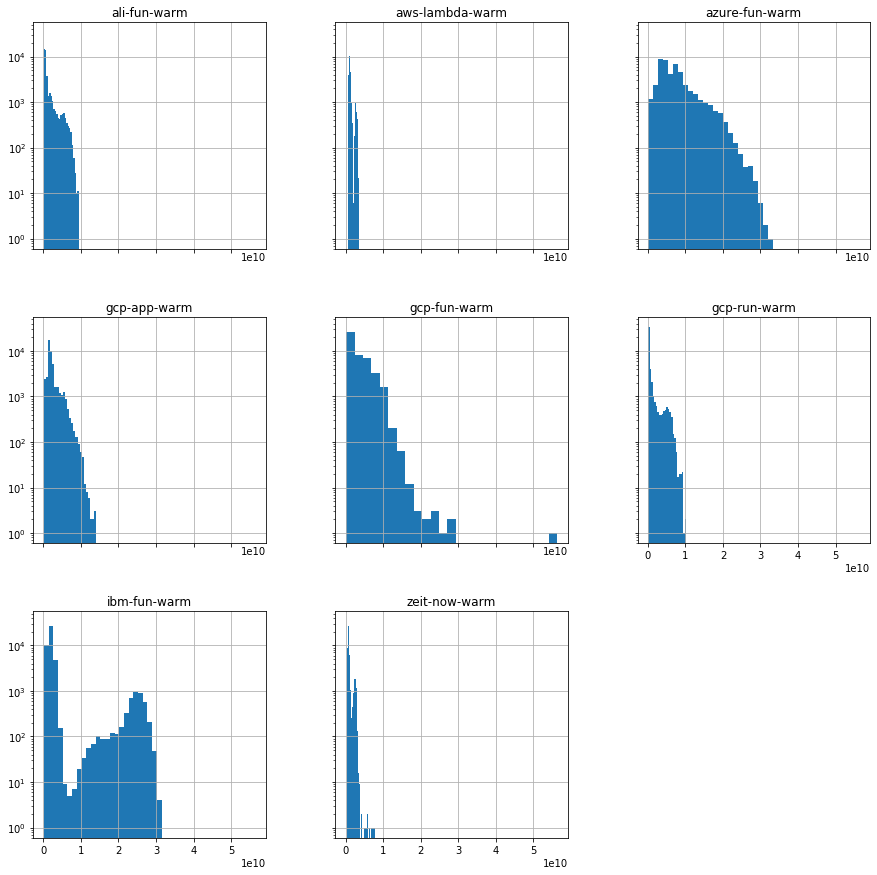

In [9]:
df500.xs('Time_ns', level=1, axis=1).hist(figsize=(15, 15), bins=25, log=True, sharex=True, sharey=True);

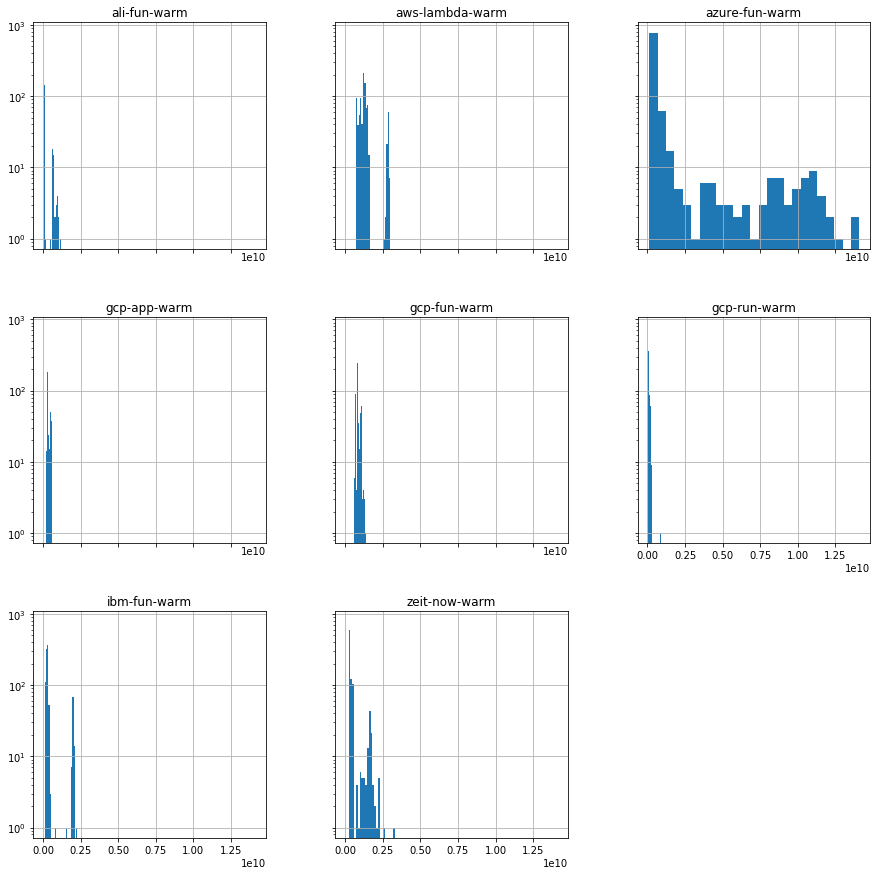

In [10]:
df10.xs('Time_ns', level=1, axis=1).hist(figsize=(15, 15), bins=25, log=True, sharex=True, sharey=True);
# df10[["zeit-now-warm", "gcp-run-warm", "gcp-fun-warm", "ibm-fun-warm", "ali-fun-warm", "gcp-app-warm", "aws-lambda-warm"]].xs('Time_ns', level=1, axis=1).hist(figsize=(15, 15), bins=25, log=True, sharex=True, sharey=True);


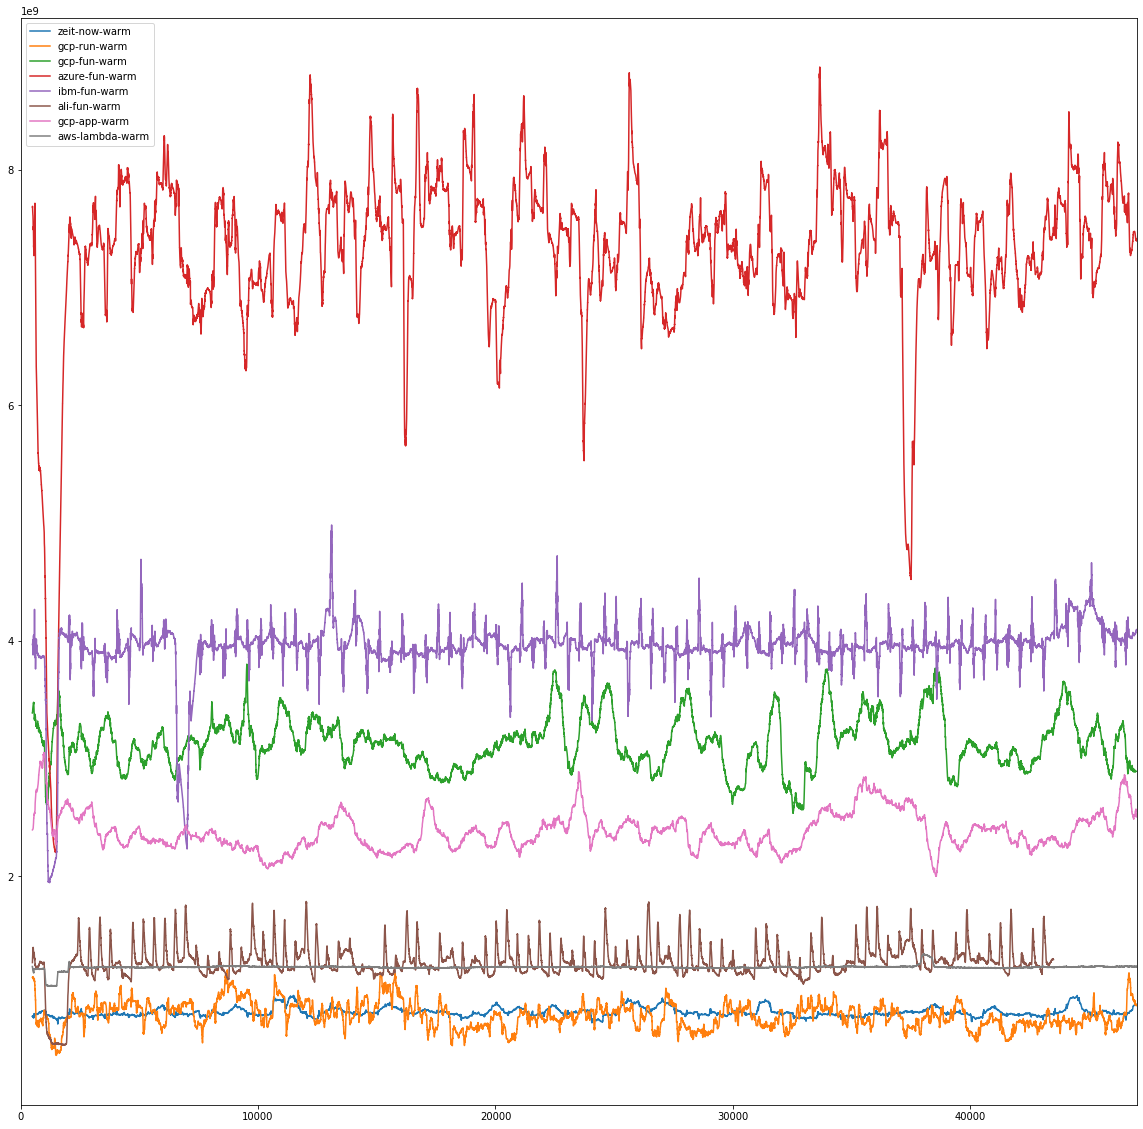

In [17]:
df500.xs('Time_ns', level=1, axis=1).rolling(500).mean().plot.line(figsize=(20, 20))

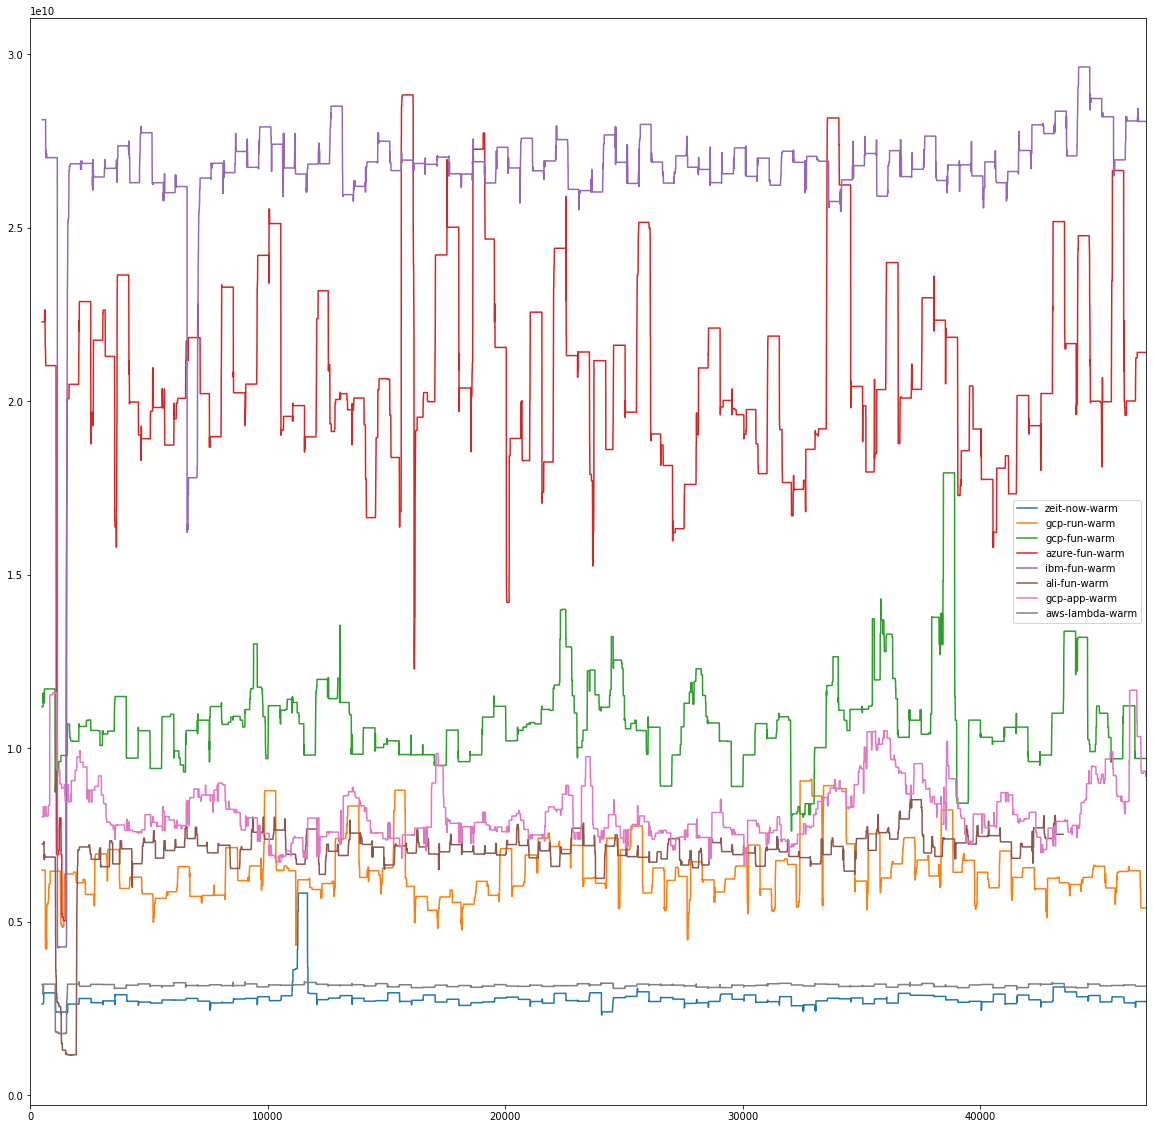

In [30]:
df500.xs('Time_ns', level=1, axis=1).rolling(500).quantile(0.99).plot.line(figsize=(20, 20))